Parkinson’s Disease (PD) is a degenerative neurological disorder marked by decreased dopamine levels in the brain. It manifests itself through a deterioration of movement, including the presence of tremors and stiffness. There is commonly a marked effect on speech, including dysarthria (difficulty articulating sounds), hypophonia (lowered volume), and monotone (reduced pitch range). Additionally, cognitive impairments and changes in mood can occur, and risk of dementia is increased.

Traditional diagnosis of Parkinson’s Disease involves a clinician taking a neurological history of the patient and observing motor skills in various situations. Since there is no definitive laboratory test to diagnose PD, diagnosis is often difficult, particularly in the early stages when motor effects are not yet severe. Monitoring progression of the disease over time requires repeated clinic visits by the patient. An effective screening process, particularly one that doesn’t require a clinic visit, would be beneficial. Since PD patients exhibit characteristic vocal features, voice recordings are a useful and non-invasive tool for diagnosis. If machine learning algorithms could be applied to a voice recording dataset to accurately diagnosis PD, this would be an effective screening step prior to an appointment with a clinician.

The data & attributes information for this project is available at https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/ (Links to an external site.)Links to an external site. The data consists of those diagnosed with Parkinson Disease and those who do not.

Steps to be followed:

Use a Python notebook & Load the dataset
It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset. (2.5 points)
Using univariate & bivariate analysis to check the individual attributes for their basic statistic such as central values, spread, tails etc. What are your observations? (15 points)
Split the dataset into training and test set in the ratio of 70:30 (Training:Test).
Create the model using “entropy” method of reducing the entropy and fit it to training data. (5 points)
Test the model on test data and what is the accuracy achieved. Capture the predicted values and do a crosstab. (7.5 points)
Use regularization parameters of max_depth, min_sample_leaf to recreate the model. What is the impact on the model accuracy? How does regularization help? (20 points) 
Next implement the decision tree using Random Forest. What is the optimal number of trees that gives the best result? (10 points)

In [168]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
#importing seaborn for statistical plots
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier

In [167]:
park_df=pd.read_csv("parkinsons.data")
print(park_df.columns)
park_df

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')


,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
5,phon_R01_S01_6,120.552,131.162,113.787,0.00968,0.00008,0.00463,0.00750,0.01388,0.04701,...,0.06985,0.01222,21.378,1,0.415564,0.825069,-4.242867,0.299111,2.187560,0.357775
6,phon_R01_S02_1,120.267,137.244,114.820,0.00333,0.00003,0.00155,0.00202,0.00466,0.01608,...,0.02337,0.00607,24.886,1,0.596040,0.764112,-5.634322,0.257682,1.854785,0.211756
7,phon_R01_S02_2,107.332,113.840,104.315,0.00290,0.00003,0.00144,0.00182,0.00431,0.01567,...,0.02487,0.00344,26.892,1,0.637420,0.763262,-6.167603,0.183721,2.064693,0.163755
8,phon_R01_S02_3,95.730,132.068,91.754,0.00551,0.00006,0.00293,0.00332,0.00880,0.02093,...,0.03218,0.01070,21.812,1,0.615551,0.773587,-5.498678,0.327769,2.322511,0.231571
9,phon_R01_S02_4,95.056,120.103,91.226,0.00532,0.00006,0.00268,0.00332,0.00803,0.02838,...,0.04324,0.01022,21.862,1,0.547037,0.798463,-5.011879,0.325996,2.432792,0.271362


Attributes: (got the information from google)

-----------------------------------------------
MDVP:Fo(Hz) - Average vocal fundamental frequency 
MDVP:Fhi(Hz) - Maximum vocal fundamental frequency
MDVP:Flo(Hz) - Minimum vocal fundamental frequency 
MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP - Several measures of variation in fundamental frequency MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA - Several measures of variation in amplitude NHR,HNR - Two measures of ratio of noise to tonal components in the voice 
status - Health status of the subject (one) - Parkinson's, (zero) - healthy 
RPDE,D2 - Two nonlinear dynamical complexity measures 
DFA - Signal fractal scaling exponent 
spread1,spread2,PPE - Three nonlinear measures of fundamental frequency variation

In [169]:
park_df.info()
#status is our target variable 
#We cant do the data cleaning as we dont know what could be the right values
#None of the columns have null values 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
name                195 non-null object
MDVP:Fo(Hz)         195 non-null float64
MDVP:Fhi(Hz)        195 non-null float64
MDVP:Flo(Hz)        195 non-null float64
MDVP:Jitter(%)      195 non-null float64
MDVP:Jitter(Abs)    195 non-null float64
MDVP:RAP            195 non-null float64
MDVP:PPQ            195 non-null float64
Jitter:DDP          195 non-null float64
MDVP:Shimmer        195 non-null float64
MDVP:Shimmer(dB)    195 non-null float64
Shimmer:APQ3        195 non-null float64
Shimmer:APQ5        195 non-null float64
MDVP:APQ            195 non-null float64
Shimmer:DDA         195 non-null float64
NHR                 195 non-null float64
HNR                 195 non-null float64
status              195 non-null int64
RPDE                195 non-null float64
DFA                 195 non-null float64
spread1             195 non-null float64
spread2             195 non-null floa

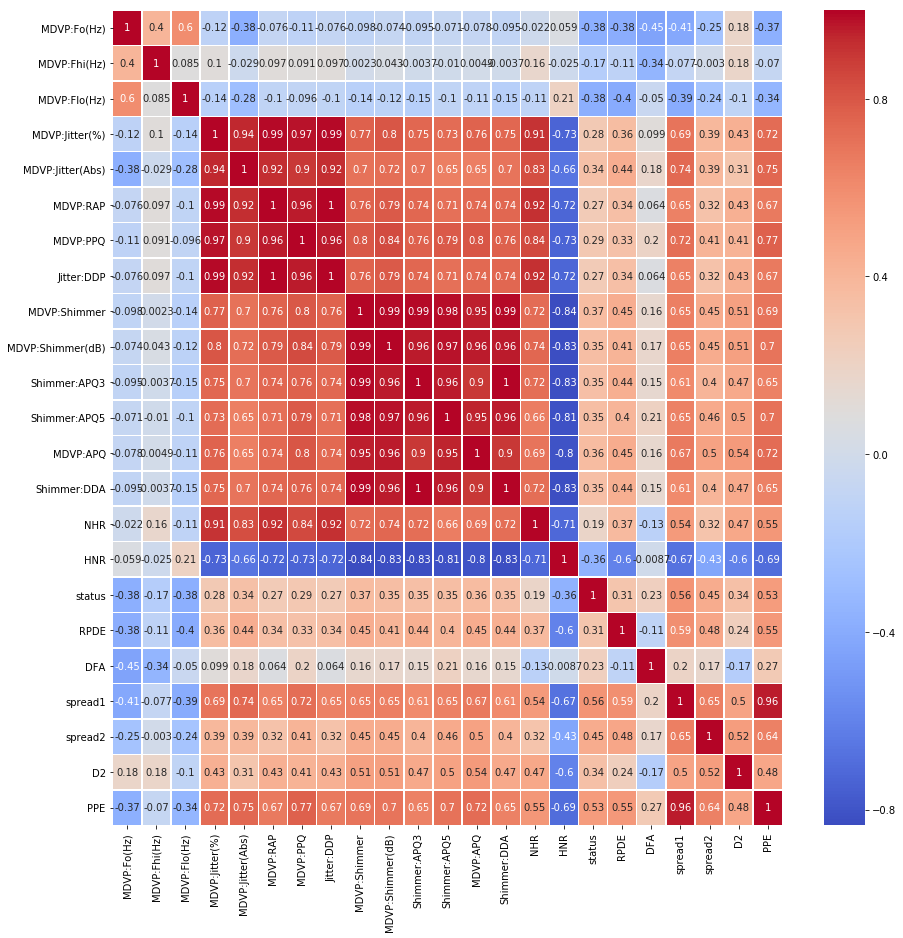

In [21]:
#checking the corelation between variables
#============================================
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(park_df.corr(), annot=True, linewidths=.5, ax=ax,cmap='coolwarm')

park_df=park_df.drop('name',axis=1)

In [170]:
#From  matrix 
#1)MDVP:Jitter(%) is highly corelated with MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP  so we can drop MDVP:Jitter(%)
#2)MDVP:Shimmer is highly corelated withMDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA  
#3)Spread1 is highly corelated with PPE. we can drop spread1                       
#4) Name column does not contribute much we can drop that as well

#Dropping highly co-related variables 
#=========================
park_df=park_df.drop(['name','MDVP:Jitter(%)','MDVP:Shimmer','spread1'],axis=1)
print(park_df.columns)

Index(['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(Abs)',
       'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP', 'MDVP:Shimmer(dB)',
       'Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR',
       'status', 'RPDE', 'DFA', 'spread2', 'D2', 'PPE'],
      dtype='object')


In [171]:
#Feature Scaling:from the coorrelation matrix we dropped few variables which were highly co related with each other. 
#But there might multicolinear variables. we need to drop that as well
#Droping variabes which have high co-relation using VIF method 
#=============================================================

park_df_vif = park_df.copy()
#this function will get the VIF and drop the column which have VIF greater than 10
def get_vif(df):
    vif_df = pd.DataFrame()
    vif_df["colname"] = df.columns
    vif_df["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif_df.sort_values('VIF',inplace=True,ascending=False)
    print(vif_df)
    if (vif_df.iloc[0,1] > 10):
        df = df.drop([vif_df.iloc[0,0]],axis=1)
    return(df)
park_df_vif = get_vif(df_vif)
park_df_vif.columns


        colname       VIF
5       spread2  9.896447
2   Shimmer:DDA  7.744860
4        status  5.384592
1  MDVP:Flo(Hz)  5.187742
0  MDVP:Fhi(Hz)  4.993220
3           NHR  2.891865


Index(['MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'Shimmer:DDA', 'NHR', 'status',
       'spread2'],
      dtype='object')

In [76]:
#We will not drop any more columns as VIF is less than 10 for remainig columns
park_df_vif = get_vif(df_vif)
park_df_vif.columns

        colname       VIF
5       spread2  9.896447
2   Shimmer:DDA  7.744860
4        status  5.384592
1  MDVP:Flo(Hz)  5.187742
0  MDVP:Fhi(Hz)  4.993220
3           NHR  2.891865


Index(['MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'Shimmer:DDA', 'NHR', 'status',
       'spread2'],
      dtype='object')

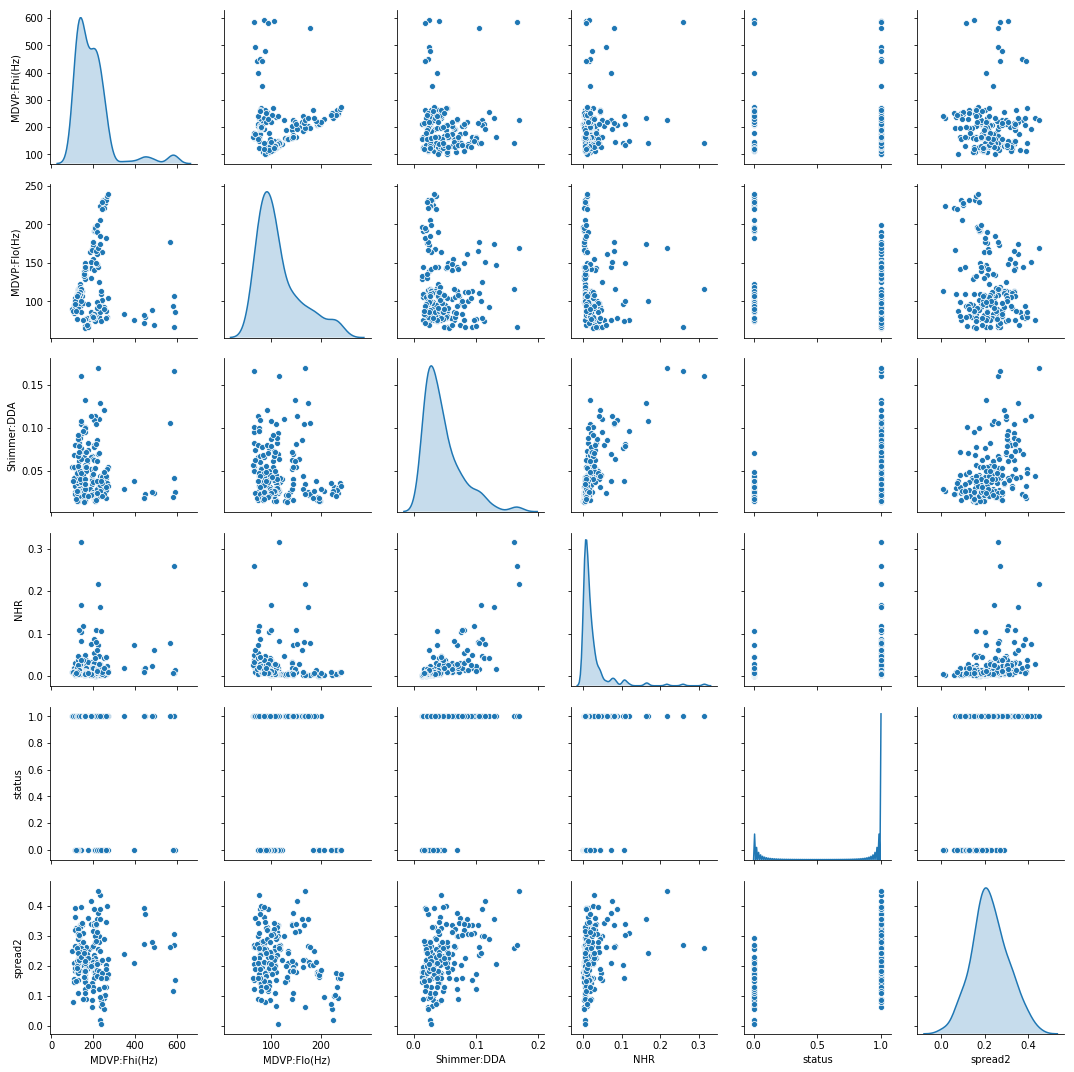

In [77]:
#Univariate/bivariate analysis
#==================================
sns.pairplot(park_df_vif,diag_kind='kde')

In [81]:
#from pairplot
#==============
# Spread2 is normally distributed whereas 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'Shimmer:DDA', 'NHR' are skewed 
#also there is no missing value present

#Also we can find that our data set is very unbalance because if we see status variable, number of patients 
#having disease is more
park_df_vif['status'].value_counts()

1    147
0     48
Name: status, dtype: int64

In [218]:
#Splitting Data
#=======================
X = park_df_vif.drop("status", axis=1)#FEATURES/INDEPENDENT VARIABLES
Y =park_df_vif["status"]#TARGET VARIABLE
 
test_size = 0.3 # taking 70:30 training and test set
seed = 4  # Random numbmer seeding for reapeatability of the code
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)


In [219]:
#Applying Decision Tree Model
#=============================
model_dt=DecisionTreeClassifier(criterion='entropy',random_state=0)
model_dt.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [220]:
#Predict Y using text 
#=============================
Y_predict=model_dt.predict(X_test)
metrics.accuracy_score(Y_test,Y_predict)
#Here accuracy score is quite less which is 83%

0.8305084745762712

In [221]:
pd.crosstab(Y_test, Y_predict,margins=True)

col_0,0,1,All
status,,,
0,11,5,16
1,5,38,43
All,16,43,59


In [222]:
metrics.confusion_matrix(Y_test,Y_predict)

#Tp
#TN
#Fp
#FN

array([[11,  5],
       [ 5, 38]], dtype=int64)

In [224]:
#metrics for decision tree
#==============================
testAccuracy = metrics.accuracy_score(Y_test,Y_predict)
testRecall = metrics.recall_score(Y_test,Y_predict)
testPrecision = metrics.precision_score(Y_test,Y_predict)
testF1score = metrics.f1_score(Y_test,Y_predict)
print("Metrics for Decision Tree \n Accuracy= %f \n Recall= %f \n Precision= %f \n F1Score= %f" %(testAccuracy,testRecall,testPrecision,testF1score))


Metrics for Decision Tree 
 Accuracy= 0.830508 
 Recall= 0.883721 
 Precision= 0.883721 
 F1Score= 0.883721


In [225]:
#Perform Grid Search Method to find the optimal max_depth size so that 
#applying the max depth we can optimize the performance of the model
#======================================================
parameter={'max_depth':np.arange(1,15),'criterion' : ['entropy','gini']}
GS=GridSearchCV(model_dt,parameter,cv=3)
GS.fit(X_train,Y_train)


F:\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]), 'criterion': ['entropy', 'gini']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [227]:
#Predicting test Y using test X in using grid search
#================================================
gs_predict=GS.predict(X_test)
metrics.accuracy_score(Y_test,gs_predict)
#there is not much improvement using grid search but we can find the max depth which equal to 9

0.8305084745762712

In [141]:
GS.best_params_

{'criterion': 'entropy', 'max_depth': 9}

In [142]:
#Applying 'max depth' and 'min_sample_leaf'  hyper parameters
#===========================================================
model_dt_mx=DecisionTreeClassifier(max_depth=9,criterion='entropy',random_state=0,min_samples_leaf=7)
model_dt_mx.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=9,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=7, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [143]:
#Predicting test Y using test X in using decision tree but with max depth and min sample leaf
Y_predict_mx=model_dt.predict(X_test)

In [236]:
#Confusion Matrix for Decision Tree after applying hyper parameters
#========================================================
metrics.confusion_matrix(Y_test,Y_predict_mx)

array([[12,  4],
       [ 3, 40]], dtype=int64)

In [229]:
#Metrices for Deceision tree after applying hyper parameters
#=============================================================
testAccuracy = metrics.accuracy_score(Y_test,Y_predict_mx)
testRecall = metrics.recall_score(Y_test,Y_predict_mx)
testPrecision = metrics.precision_score(Y_test,Y_predict_mx)
testF1score = metrics.f1_score(Y_test,Y_predict_mx)
print("Metrics for Decision Tree after applying hyper parameters \n Accuracy= %f \n Recall= %f \n Precision= %f \n F1Score= %f" %(testAccuracy,testRecall,testPrecision,testF1score))

#we can see that #there is a improvement using few parameters max depth and min_samples_leaf from 83 to 88

Metrics for Decision Tree after applying hyper parameters 
 Accuracy= 0.881356 
 Recall= 0.930233 
 Precision= 0.909091 
 F1Score= 0.919540


In [231]:
#Random Forest Model
#============================================================================
model_rf = RandomForestClassifier(n_estimators=99,criterion='entropy',random_state=0,max_depth=9)
model_rf.fit(X_train,Y_train)
Rf_predict=model_rf.predict(X_test)


In [237]:
#Confusion Mtrix for Random Forest 
#===================================
metrics.confusion_matrix(Y_test,Rf_predict)

array([[10,  6],
       [ 2, 41]], dtype=int64)

In [234]:
#Metrics for Random Forest using n-estimators
#==================================================
testAccuracy = metrics.accuracy_score(Y_test,Rf_predict)
testRecall = metrics.recall_score(Y_test,Rf_predict)
testPrecision = metrics.precision_score(Y_test,Rf_predict)
testF1score = metrics.f1_score(Y_test,Rf_predict)
print("Metrics for Random Forest using n-estimators ='99' \n Accuracy= %f \n Recall= %f \n Precision= %f \n F1Score= %f" %(testAccuracy,testRecall,testPrecision,testF1score))

#using 99 number of trees the algorithm builds before taking the maximum voting and which gives optimal accuracy

Metrics for Random Forest using n-estimators ='99' 
 Accuracy= 0.864407 
 Recall= 0.953488 
 Precision= 0.872340 
 F1Score= 0.911111


In [148]:
models = []
models.append(('DecisionTree', model_dt_mx))
models.append(('RandomForest', model_rf))

DecisionTree: 0.853307 (0.003848)
RandomForest: 0.940793 (0.002618)


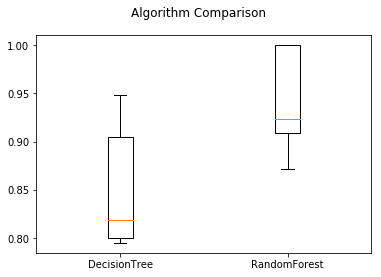

In [210]:
# evaluate each model in turn after doing 5 fold comparisions
results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(n_splits=5,random_state=2)
	cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring='recall')
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, np.mean(cv_results), cv_results.var())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [ ]:
#after doing k fold comparions we came to a conclusion that random tree performs well compared to decision tree 
#we can choose random tree as our final model